<a href="https://colab.research.google.com/github/JoshuaHm09/Proyecto_Final_Assembler/blob/main/Copy_of_Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Regresión Lineal ===
Error cuadratico medio:  0.05
Coeficiente de Determinacion : 0.35

=== Comparacion ===

-- Lineal (0.5) --
Exactitud global : 0.94
Precision en positivos : 0.99
Cobertura de casos positivos    0.31
Balance Presicion/Recuperacion: 0.47
Capacidad de Discriminación  : 0.95

-- Logística --
Exactitud global : 0.96
Precision en positivos : 0.88
Cobertura de casos positivos    0.64
Balance Presicion/Recuperacion: 0.74
Capacidad de Discriminación  : 0.96


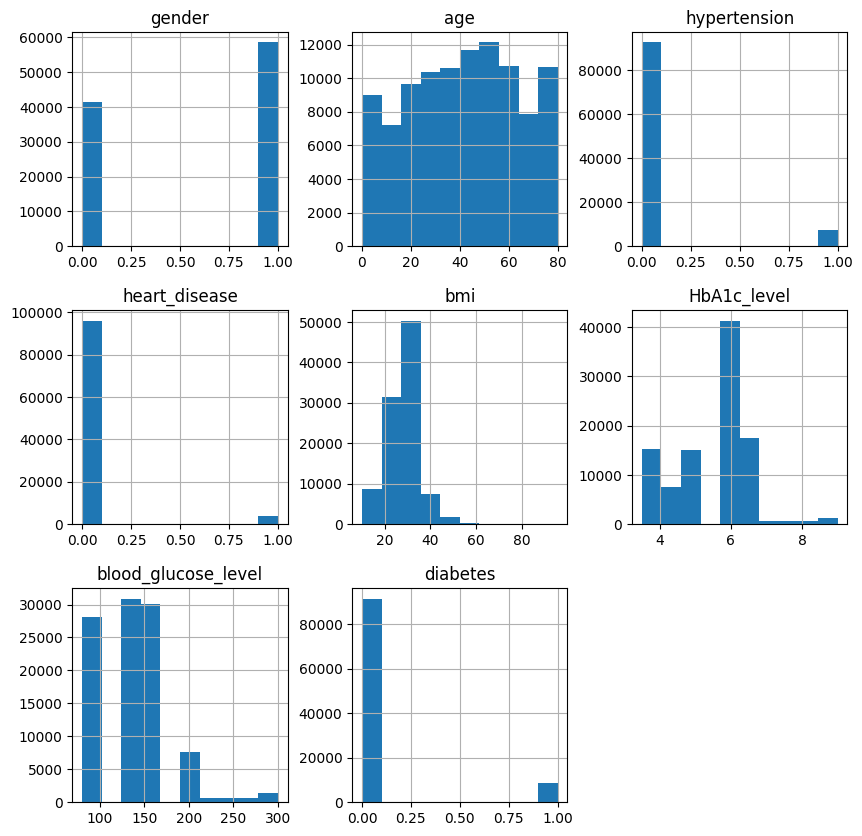

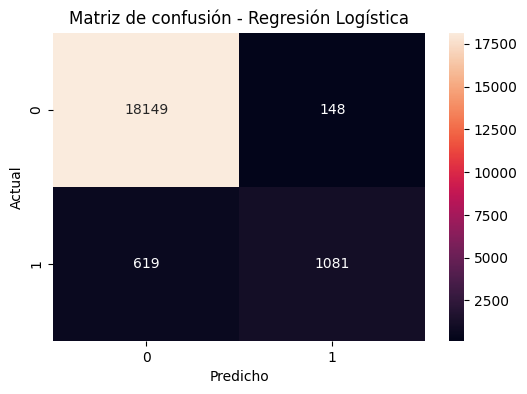

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

df = pd.read_csv('diabetes_prediction_dataset.csv')


for col in ['bmi', 'HbA1c_level', 'blood_glucose_level']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    med = df.loc[df[col] != 0, col].median()
    df.loc[df[col] == 0, col] = med


df = pd.get_dummies(df, columns=['smoking_history'], prefix='smoke', drop_first=False)


df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})


smoke_cols = [col for col in df.columns if col.startswith('smoke_')]
ordered_cols = ['gender', 'age', 'hypertension', 'heart_disease'] + smoke_cols + ['bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
df = df[ordered_cols]

df.dropna(inplace=True)

X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_reg = lr.predict(X_test)

log = LogisticRegression(max_iter=1000)
log.fit(X_train, y_train)
y_pred_clf = log.predict(X_test)
y_proba_clf = log.predict_proba(X_test)[:,1]


print("=== Regresión Lineal ===")
print(f"Error cuadratico medio:  {mean_squared_error(y_test, y_pred_reg):.2f}")
print(f"Coeficiente de Determinacion : {r2_score(y_test, y_pred_reg):.2f}")

df.hist(figsize=(10, 10))


print("\n=== Comparacion ===")
y_pred_reg_class = (y_pred_reg > 0.5).astype(int)
for name, pred, proba in [
    ("Lineal (0.5)", y_pred_reg_class, y_pred_reg),
    ("Logística",    y_pred_clf,        y_proba_clf)
]:

    print(f"\n-- {name} --")
    print(f"Exactitud global : {accuracy_score(y_test, pred):.2f}")
    print(f"Precision en positivos : {precision_score(y_test, pred):.2f}")
    print(f"Cobertura de casos positivos    {recall_score(y_test, pred):.2f}")
    print(f"Balance Presicion/Recuperacion: {f1_score(y_test, pred):.2f}")
    print(f"Capacidad de Discriminación  : {roc_auc_score(y_test, proba):.2f}")




cm = confusion_matrix(y_test, y_pred_clf)
plt.figure(figsize=(6,4))
sb.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de confusión - Regresión Logística')
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.show()


<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  float64
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   smoke_No Info        99982 non-null  bool   
 5   smoke_current        99982 non-null  bool   
 6   smoke_ever           99982 non-null  bool   
 7   smoke_former         99982 non-null  bool   
 8   smoke_never          99982 non-null  bool   
 9   smoke_not current    99982 non-null  bool   
 10  bmi                  99982 non-null  float64
 11  HbA1c_level          99982 non-null  float64
 12  blood_glucose_level  99982 non-null  int64  
 13  diabetes             99982 non-null  int64  
dtypes: bool(6), float64(4), int64(4)
memory usage: 7.4 MB


<Axes: xlabel='age', ylabel='bmi'>

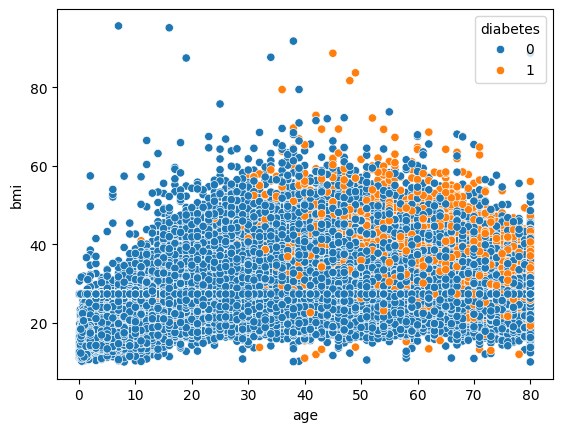

In [ ]:
df.info()
df.describe()
sb.scatterplot(x='age', y="bmi", data=df, hue="diabetes")
